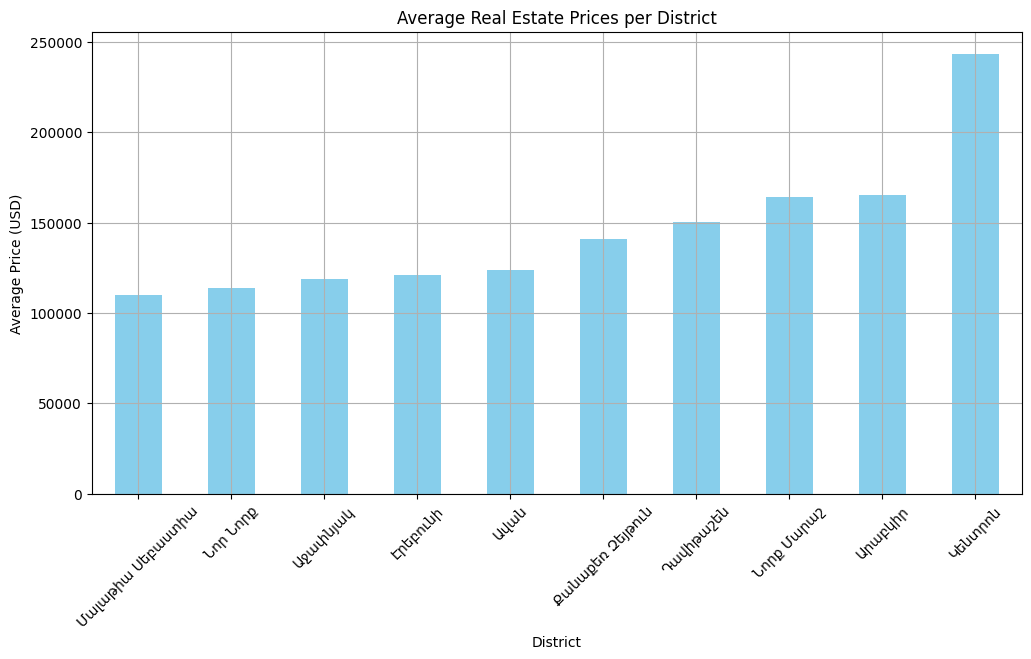

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first CSV file for real estate prices
file_path_bnakaranner = 'Bnakaranner.csv'
data_bnakaranner = pd.read_csv(file_path_bnakaranner)

# Check the structure of the first dataset
bnakaranner_head = data_bnakaranner.head()
bnakaranner_columns = data_bnakaranner.columns

# Grouping data by district and calculating average price
district_price_avg = data_bnakaranner.groupby('district')['price'].mean().sort_values()

# Plot the average price per district
plt.figure(figsize=(12, 6))
district_price_avg.plot(kind='bar', color='skyblue')
plt.title('Average Real Estate Prices per District')
plt.xlabel('District')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

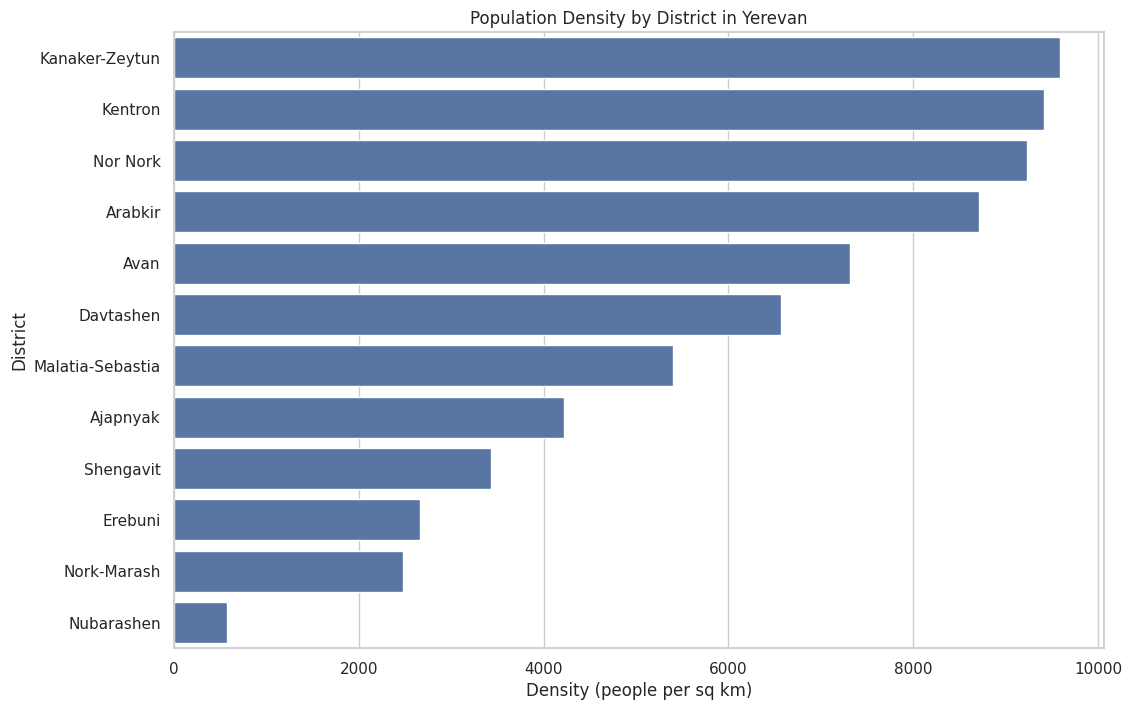

In [2]:
# Load the second CSV file for population density
file_path_yerevan = 'yerevan_districts.csv'
yerevan_data = pd.read_csv(file_path_yerevan)

# Check the structure of the second dataset
yerevan_head = yerevan_data.head()
yerevan_columns = yerevan_data.columns

# Calculate the population density for each district
yerevan_data['Density'] = yerevan_data['Population'] / yerevan_data['Area']

# Set up the visualization style
sns.set(style="whitegrid")

# Create a bar plot for population density of each district
plt.figure(figsize=(12, 8))
density_plot = sns.barplot(x='Density', y='District', data=yerevan_data.sort_values(by='Density', ascending=False))
plt.title('Population Density by District in Yerevan')
plt.xlabel('Density (people per sq km)')
plt.ylabel('District')

# Show the plot
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd

# Load apartment dataset
apartment_data = pd.read_csv('Bnakaranner.csv')
# Load district data
district_data = pd.read_csv('yerevan_districts.csv')

# Define a mapping between Armenian and English district names
district_mapping = {
    'Աջափնյակ': 'Ajapnyak',
    'Արաբկիր': 'Arabkir',
    'Ավան': 'Avan',
    'Դավիթաշեն': 'Davtashen',
    'Էրեբունի': 'Erebuni',
    'Քանաքեռ Զեյթուն': 'Kanaker-Zeytun',
    'Կենտրոն': 'Kentron',
    'Մալաթիա Սեբաստիա': 'Malatia-Sebastia',
    'Նոր Նորք': 'Nor Nork',
    'Նորք Մարաշ': 'Nork-Marash'
}

# Apply the mapping to the apartment dataset
apartment_data['district_english'] = apartment_data['district'].map(district_mapping)

# Calculate the average price per district using English names
district_avg_price = apartment_data.groupby('district_english')['price'].mean().reset_index()

# Add the "solvency level" column using quantile cuts
district_avg_price['solvency_level'] = pd.qcut(district_avg_price['price'], 10, labels=range(1, 11))

# Calculate the density for each district in the district dataset
district_data['Density'] = district_data['Population'] / district_data['Area']

# Add a "density level" column using quantile cuts
district_data['density_level'] = pd.qcut(district_data['Density'], 10, labels=range(1, 11))

# Merge the solvency levels with the main district dataset
district_data = district_data.merge(district_avg_price[['district_english', 'solvency_level']], left_on='District', right_on='district_english', how='left').drop(columns='district_english')

# Display the final dataset with both solvency and density levels
final_data = district_data[['District', 'Density', 'density_level', 'solvency_level']]
print(final_data)



            District      Density density_level solvency_level
0           Ajapnyak  4225.406662             4              3
1            Arabkir  8713.318284             8              9
2               Avan  7314.049587             7              5
3          Davtashen  6568.778980             6              7
4            Erebuni  2663.718678             2              4
5     Kanaker-Zeytun  9586.028461            10              6
6            Kentron  9415.730337            10             10
7   Malatia-Sebastia  5401.430843             5              1
8        Nork-Marash  2478.991597             1              8
9           Nor Nork  9234.585400             9              2
10        Nubarashen   568.445476             1            NaN
11         Shengavit  3426.108374             3            NaN


In [4]:
import folium

# Path to the GeoJSON file
geojson_path = 'map_yerevan.geojson'

# Sample mapping of coordinates for each district (latitude, longitude)
district_coordinates = {
    'Ajapnyak': [40.200439, 44.461845],
    'Arabkir': [40.207286, 44.509420],
    'Avan': [40.219372, 44.561271],
    'Davtashen': [40.216804, 44.487088],
    'Erebuni': [40.141788, 44.533836],
    'Kanaker-Zeytun': [40.211948, 44.539738],
    'Kentron': [40.182989, 44.514720],
    'Malatia-Sebastia': [40.173811, 44.457587],
    'Nork-Marash': [40.179985, 44.539855],
    'Nor Nork': [40.188253, 44.567883],
    'Nubarashen': [40.089565, 44.549880],
    'Shengavit': [40.148496, 44.490789]
}


# List of battery store locations with their coordinates
locations = [
    {"name": "GARAJ.AM - Shengavit", "address": "Armenia, Yerevan, Arshakunyats Ave., 119/12 Building", "lat": 40.14394657149082, "lon": 44.496662753693506},
    {"name": "GARAJ.AM - Kanaker-Zeytun", "address": "Armenia, Yerevan, Rubinyants St., 31 Building", "lat": 40.204418720007865, "lon": 44.55424787110309},
    {"name": "AVTOBAT", "address": "Armenia, Ararat Marz, Ayntap village, Yerevan-Meghri Highway, №4", "lat": 40.080464, "lon": 44.463768},
    {"name": "Automax Nar-Dosi 122", "address": "Armenia, 0018, Yerevan Nar-Dosi St., 122 Building", "lat": 40.212975, "lon": 44.503599},
    {"name": "Automax Nar-Dosi 51", "address": "Armenia, 0018, Yerevan Nar-Dosi St., 51 Building", "lat": 40.166134, "lon": 44.516715},
    {"name": "Automax Davtashen", "address": "Armenia, 0054, Yerevan Davtashen, 4th District, 41/11 Building", "lat": 40.223683, "lon": 44.502818},
    {"name": "Automax Noragavit", "address": "Armenia, 0803, Ararat Marz, Ayntap village Yerevan-Meghri Highway, №5", "lat": 40.080464, "lon": 44.463768},
    {"name": "Automax Ashtaraki Motorway", "address": "Armenia, 2415, Kotayk Marz, Kasakh village Ashtaraki Motorway, Shop №6", "lat": 40.229921, "lon": 44.447230},
    {"name": "Automax Ptghni", "address": "Armenia, 2228, Kotayk Marz, Verin Ptghni village Nor Taghamas District, 1st St., Shop №65", "lat": 40.246602, "lon": 44.582750},
    {"name": "Automax - Movses Khorenatsu St.", "address": "Armenia, 0018, Yerevan Movses Khorenatsu St., 101 Building", "lat": 40.162343, "lon": 44.516751},
    {"name": "METS ANIV (Nor Nork)", "address": "Armenia, 0096, Yerevan Nor Nork 2nd Block, Gai Ave., 1/7 Building", "lat": 40.207513, "lon":44.561810},
    {"name": "METS ANIV (Kentron)", "address": "Armenia, Yerevan, Charentsi St., 143 Building", "lat": 40.169297, "lon":44.524530},
    {"name": "METS ANIV (Avan)", "address": "Armenia, Yerevan, Yerevan-Sevan Highway, 54 Building", "lat": 40.240847, "lon": 44.571054},
    {"name": "METS ANIV (Noragavit)", "address": "Armenia, Yerevan, Noragavit, 101/11 Building", "lat": 40.107349, "lon": 44.470344},
    {"name": "METS ANIV (15th District)", "address": "Armenia, 0088, Yerevan, Shirazi St., 43/1 Building", "lat": 40.207182, "lon": 44.461396},
    {"name": "METS ANIV (Arin-Berdi St.)", "address": "Armenia, 0087, Yerevan, Arin-Berdi St., 2/9 Building, Pavilion 7", "lat": 40.123923, "lon": 44.503878},
    {"name": "NAKOIL (Sebastiai St.)", "address": "Armenia, 0032, Yerevan, Sebastiai St., 141/1 Building", "lat": 40.172157, "lon": 44.457812},
    {"name": "NAKOIL (Zakaria Kanakertsu St.)", "address": "Armenia, 0091, Yerevan, Zakaria Kanakertsu St., 155/6 Building", "lat": 40.227319, "lon": 44.549099},
    {"name": "NAKOIL (Mazmanyan St.)", "address": "Armenia, 0088, Yerevan, 15th District, Mazmanyan St., 1 Building, Pavilion 63", "lat": 40.209779, "lon": 44.464127},
    {"name": "NAKOIL (Geghanist village)", "address": "Armenia, 0806, Ararat Marz, Geghanist village, 12th St. 1st Blind Alley, 5/1 Building", "lat": 40.144580, "lon": 44.427539},
    {"name": "MONARCH 20", "address": "Armenia, 0051, Yerevan, Mamikonyants St., 58 Building", "lat": 40.209924, "lon": 44.510328},
    {"name": "BINAM - Bosch Auto Service (Arshakunyats Ave.)", "address": "Armenia, 0061, Yerevan, Arshakunyats Ave., 56/2 Building", "lat": 40.145063, "lon": 44.496637},
    {"name": "BINAM (Arin-Berdi St.)", "address": "Armenia, 0053, Yerevan, Arin-Berdi St., 1/1 Building", "lat": 40.125143, "lon": 44.504426},
    {"name": "BINAM (Acharyan St.)", "address": "Armenia, 0040, Yerevan, Acharyan St., 22-52 Building", "lat": 40.215964, "lon": 44.562663},
    {"name": "BINAM - Bosch Auto Service (Mazmanyan St.)", "address": "Armenia, 0088, Yerevan, 15th District, Mazmanyan St., 1 Building", "lat": 40.209874, "lon": 44.465161},
    {"name": "VARMEX (Tigran Metsi Ave.)", "address": "Armenia, 0005, Yerevan, Tigran Metsi Ave., 46 Building", "lat": 40.160441, "lon": 44.511711},
    {"name": "VARMEX (Mamikonyants St.)", "address": "Armenia, 0051, Yerevan, Mamikonyants St., 54 Building", "lat": 40.209807, "lon": 44.512618},
    {"name": "VARMEX (Sebastiai St.)", "address": "Armenia, 0065, Yerevan, Sebastiai St., 81/1 Building", "lat": 40.179427, "lon": 44.459555},
    {"name": "VARMEX (Autogallery)", "address": "Armenia, 0087, Yerevan, Arin-Berdi St., 2/9 Building, Pavilion 11", "lat": 40.123973, "lon": 44.503842},
    {"name": "HYPER MOTORS", "address": "Armenia, 0054, Yerevan, Davtashen, 3rd District, Pirumyanneri St., 10 Building", "lat": 40.219414, "lon": 44.494912},
    {"name": "AVTOSHEM (Nar-Dosi St.)", "address": "Armenia, 0018, Yerevan, Nar-Dosi St., 118 Building", "lat": 40.167182, "lon": 44.522661},
    {"name": "AVTOSHEM (Avan)", "address": "Armenia, 0040, Yerevan, Acharyan St., 9/2 Building", "lat": 40.217093, "lon": 44.561783},
    {"name": "AVTOSHEM (Davtashen, 4th District)", "address": "Armenia, 0054, Yerevan, Davtashen, 4th District, 46/3 Building", "lat": 40.224020, "lon": 44.502144},
    {"name": "TURBOLINE (Mazmanyan St.)", "address": "Armenia, 0088, Yerevan, 15th District, Mazmanyan St., 1 Building", "lat": 40.209679, "lon": 44.464749},
    {"name": "TURBOLINE (Shirazi St.)", "address": "Armenia, 0088, Yerevan, Shirazi St., 39/1 Building", "lat": 40.208140, "lon": 44.461989},
    {"name": "TURBOLINE (Sevani St.)", "address": "Armenia, 0026, Yerevan, Sevani St., 34 Building", "lat": 40.158305, "lon": 44.506519},
    {"name": "TURBOLINE (Grigor Hasratyan St.)", "address": "Armenia, 0031, Yerevan, Grigor Hasratyan St., 13/1 Building", "lat": 40.194295, "lon": 44.462492},
    {"name": "ELBAT", "address": "Armenia, 0043, Yerevan, Sharuri St., 37/29 Building", "lat": 40.137789, "lon": 44.458773},
    {"name": "VOLTAGE BATTERY SHOP", "address": "Armenia, Yerevan, Orbeli Yeghbayrneri St., 67 Building", "lat": 40.193930, "lon": 44.487924},
    {"name": "AVTOMOTIV 7", "address": "Armenia, 0086, Yerevan, Artashisyan Ave., 79 Building", "lat": 40.146214, "lon": 44.465097},
    {"name": "FILL FAST BATTERY SHOP", "address": "Armenia, Yerevan, Kievyan St., 10/58 Building", "lat": 40.194109, "lon": 44.487277},
    {"name": "FIRMATECH LLC", "address": "Armenia, 0046, Yerevan, Manandyan St., 31 Building", "lat": 40.148558, "lon": 44.479300},
    {"name": "AVTOSHINA LLC", "address": "Armenia, 0053, Yerevan, Arin-Berdi St., 1/4 Building", "lat": 40.124578, "lon": 44.508127},
    {"name": "AV BATTERY SHOP (ASHOT NAHAPETYAN)", "address": "Armenia, Yerevan, Shiraki St., 9/2 Building, Area 1", "lat": 40.143836, "lon": 44.463049},
    {"name": "ARAM ZAREYAN Individual Entrepreneur", "address": "Armenia, 0025, Yerevan, Charentsi St., 151 Building", "lat": 40.168705, "lon": 44.524072},
    {"name": "ABRO (AUTO-COMFORT LLC)", "address": "Armenia, Yerevan, Arshakunyats Ave., 6/75 Building", "lat": 40.169752, "lon": 44.507483},
]
# Create a map centered around Yerevan
yerevan_map = folium.Map(location=[40.1772, 44.5035], zoom_start=12)

# Add the GeoJSON layer to the map
folium.GeoJson(
    geojson_path,
    name='geojson'
).add_to(yerevan_map)

# Add markers for each district with density and solvency levels
for _, row in district_data.iterrows():
    district_name = row['District']
    density_level = row['density_level']
    solvency_level = row['solvency_level']

    # Ensure coordinates exist for this district
    if district_name in district_coordinates:
        coordinates = district_coordinates[district_name]

        # Add a marker with relevant popup data
        popup_info = f"<b>District:</b> {district_name}<br><b>Density Level:</b> {density_level}<br><b>Solvency Level:</b> {solvency_level}"
        folium.Marker(
            location=coordinates,
            popup=popup_info,
            tooltip=district_name
        ).add_to(yerevan_map)

# Add markers for each battery store location
for loc in locations:
    folium.CircleMarker(
        [loc["lat"], loc["lon"]],
        radius=8,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"<b>{loc['name']}</b><br>{loc['address']}",
        tooltip=loc["name"]
    ).add_to(yerevan_map)

# Display the map
yerevan_map
